In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import MDS

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

**Load data**


In [2]:
### Check the directory list in My Drive
#!ls "/content/drive/My Drive"

feature_matrix=np.load("X.npy")
print(feature_matrix.shape)

(2169, 45768)


In [3]:
print(feature_matrix[0][1])

0.0


In [4]:
### Calculate log transformation

std_feature_matrix=np.log2(feature_matrix+1)
std_xmax = np.max(std_feature_matrix[:,0])

# PCA 


In [5]:
pca = PCA()

###---Standardized data PCA and Variance
std_z = pca.fit_transform(std_feature_matrix)
std_var=pca.explained_variance_ratio_[0:100]

### number of PCAs required to cover 85% of data
#no_PCA=np.where(np.cumsum(pca.explained_variance_ratio_) >=.85)[0][0]
#std_85pct=np.sum(pca.explained_variance_ratio_[0:1250])
###---END ###Standardized data PCA and Variance


In [6]:
print(np.sum(pca.explained_variance_ratio_[0:320]))

0.5069826828314355


In [7]:
colors=['red','blue','orange','green','yellow','purple','brown','magenta']

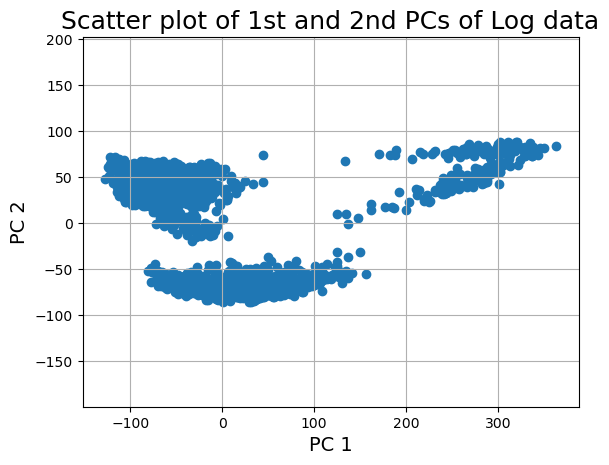

In [8]:
### Std Plot PCA PC1 and PC2
plt.scatter(std_z[:,0],std_z[:,1])
plt.title("Scatter plot of 1st and 2nd PCs of Log data",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.grid(True)
plt.axis("equal")
plt.show()

# MDS


In [ ]:
#######################################
### Multidimension scaling
#######################################
mds = MDS(n_components=2,verbose=1,eps=1e-5)

mds.fit(std_feature_matrix)

MDS(dissimilarity='euclidean', eps=1e-05, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=1)

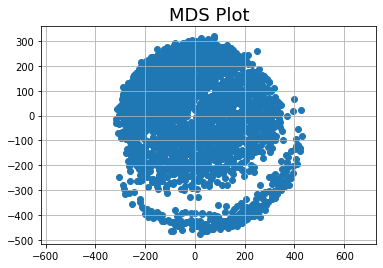

In [ ]:
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.grid(True)
plt.show()


# tSNE

In [7]:
tsne = TSNE(n_components=2,verbose=1,perplexity=30)

z_tsne = tsne.fit_transform(std_z[:,0:320])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.061s...
[t-SNE] Computed neighbors for 2169 samples in 2.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 32.426178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.572449
[t-SNE] KL divergence after 1000 iterations: 0.825691


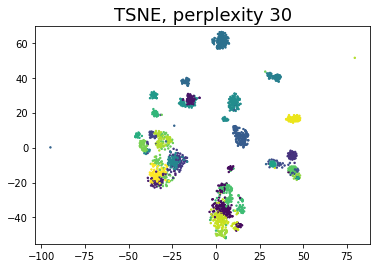

In [10]:
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y_36,s=2)
plt.title("TSNE, perplexity 30",size=18)
plt.axis("equal")
plt.show()

# K Means

## K Means uses PCA

In [7]:
kmeans_36 = KMeans(n_clusters=36,n_init=10)
y_36 = kmeans_36.fit_predict(std_z[:,0:320])


In [29]:
kmeans_8 = KMeans(n_clusters=8,n_init=10)
y_8 = kmeans_8.fit_predict(std_z[:,0:320])

In [8]:
print(y_36.shape)
print(std_z.shape)
print(y_36[0])
print(np.unique(y_36))

(2169,)
(2169, 2169)
33
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


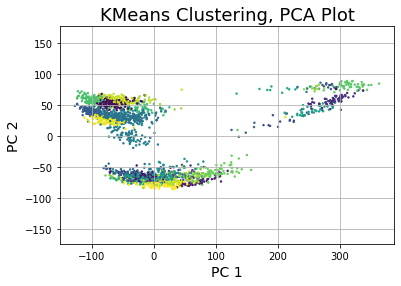

In [11]:
plt.scatter(std_z[:,0],std_z[:,1],c=y_36,s=2)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.grid(True)
plt.show()

## Sum of Square Criterian

In [22]:
n_kclusters=36
cluster_target=[3,8,36]
all_kmeans = [KMeans(n_clusters=cluster_target[i],n_init=100) for i in range(len(cluster_target))]
for i in range(len(cluster_target)):
    all_kmeans[i].fit(std_z[:,0:320])

inertias = [all_kmeans[i].inertia_ for i in range(len(cluster_target))]

In [24]:
print(inertias)

[51227153.264009275, 43460196.93697142, 34211962.29708257]


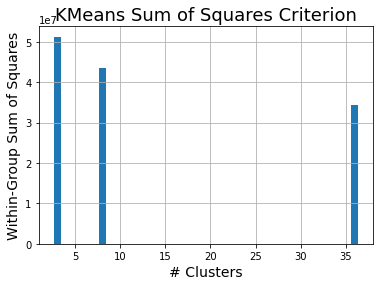

In [28]:
plt.bar(cluster_target,inertias)
#plt.axvline(x=3,c=colors[5])
plt.title("KMeans Sum of Squares Criterion",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Group Sum of Squares",size=14)
plt.grid(True)
plt.show()

## K Means uses MDS

In [ ]:
mds = MDS(n_components=2,verbose=1,eps=1e-5)
mds.fit(std_feature_matrix)

MDS(dissimilarity='euclidean', eps=1e-05, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=1)

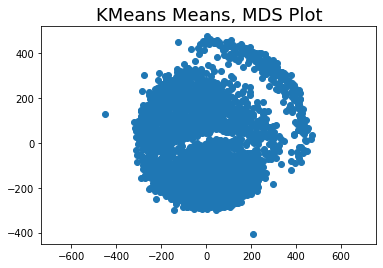

In [ ]:
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])
plt.title("KMeans Means, MDS Plot",size=18)
plt.axis("equal")
plt.show()

In [ ]:
mds_stdz = MDS(n_components=2,verbose=1,eps=1e-5)
mds_stdz.fit(std_z)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


MDS(dissimilarity='euclidean', eps=1e-05, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=1)

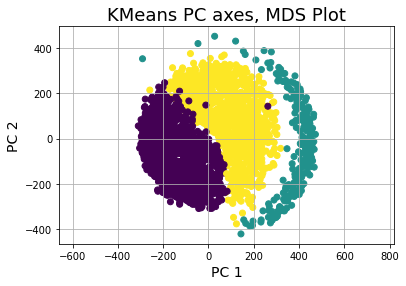

In [ ]:
plt.scatter(mds_stdz.embedding_[:,0],mds_stdz.embedding_[:,1],c=y)
plt.title("KMeans PC axes, MDS Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.grid(True)
plt.show()

## K Means use tSNE

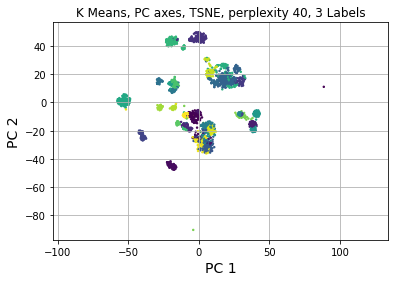

In [26]:
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y_36,s=2)
plt.title("K Means, PC axes, TSNE, perplexity 40, 3 Labels",size=12)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.grid(True)
plt.show()

# **Silhouette Score**

In [28]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [27]:
n_kclusters=36

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import rcmod
from yellowbrick.style.colors import resolve_colors

# Ignore the warning that will pop up when we do rcmod.reset_orig()
import warnings
warnings.simplefilter(action='ignore', category=plt.cbook.MatplotlibDeprecationWarning)
# Yellowbrick changes the plotting settings, reset to default here

rcmod.reset_orig()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
avg_raw_silhouette=[silhouette_score(std_feature_matrix,all_kmeans[i].labels_) for i in range(1,n_kclusters)]

In [ ]:
print(avg_raw_silhouette)

[0.2944617480176854, 0.08563695257846272, 0.06370074804016398, 0.026851287708237474, 0.008790013135197483, 0.003913339950773865, 0.009624572542574534, 0.008238349604428393, 0.0022146619541649347]


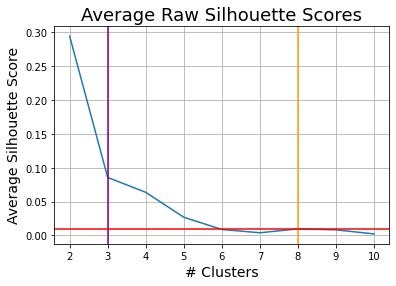

In [ ]:
plt.plot(np.arange(2,n_kclusters+1),avg_raw_silhouette)
plt.axvline(x=3,c=colors[5])
plt.axvline(x=8,c=colors[2])
plt.axhline(y=0.00963,c=colors[0])
plt.title("Average Raw Silhouette Scores",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Average Silhouette Score",size=14)
plt.grid(True)
plt.show()

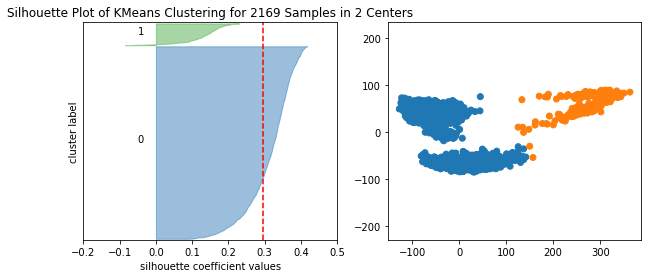

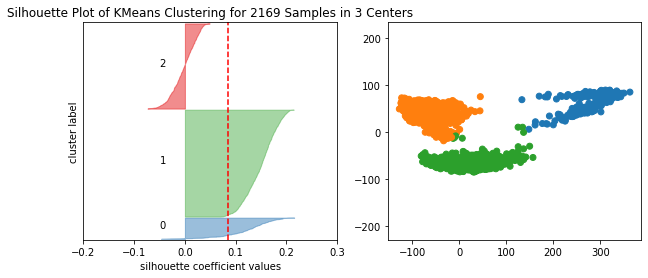

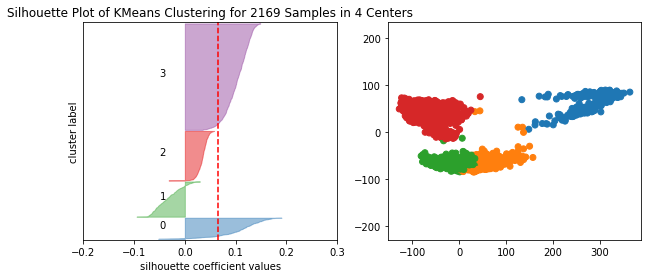

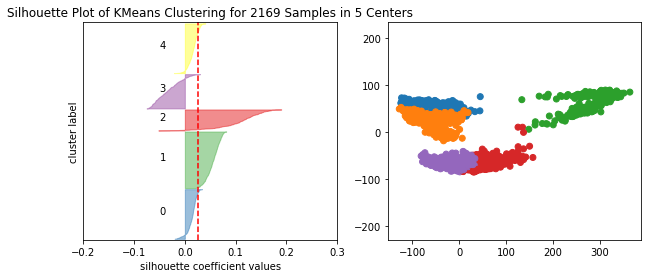

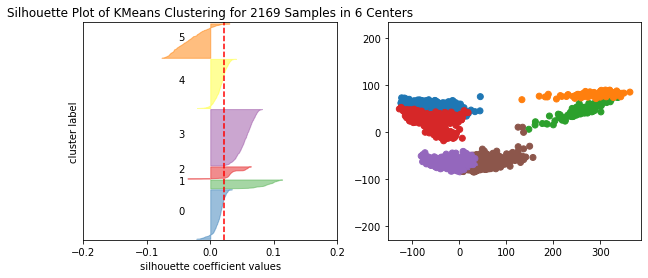

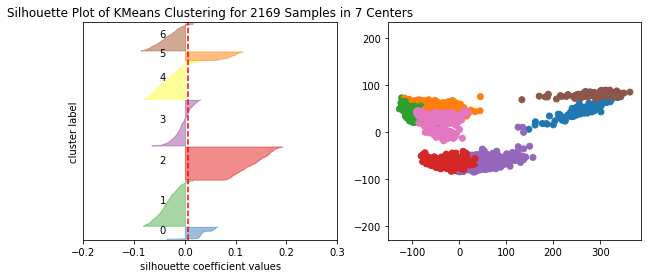

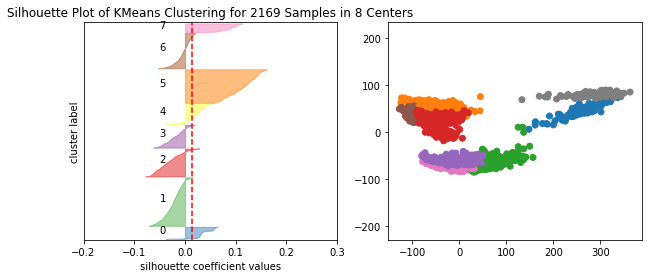

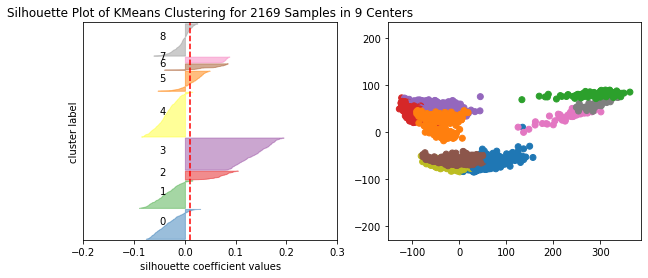

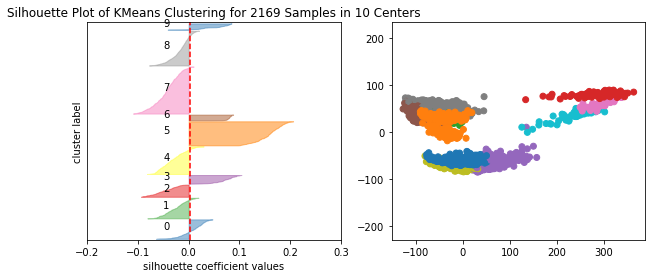

In [ ]:
visualizers = [SilhouetteVisualizer(all_kmeans[i], colors='yellowbrick',is_fitted=True) for i in range(1,n_kclusters)]
for i in range(n_kclusters-1):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
    visualizer = SilhouetteVisualizer(all_kmeans[i+1], colors='yellowbrick',is_fitted=True,ax=ax1)
    visualizer.fit(std_feature_matrix)
    
    idx_colors = np.array(resolve_colors(i+2))
    ax2.scatter(std_z[:,0],std_z[:,1],c=idx_colors[all_kmeans[i+1].labels_])
    ax2.axis("equal")
    
    # If we want to set axes to be the same for all plots, need to do something like this
    # instead of visualizer.show(), which resets the axes
    visualizer.finalize()
    #ax1.set_xlim((-.4,.8))
    plt.show()

In [ ]:
avg_silhouette_scores = [silhouette_score(std_z[:,0:50],all_kmeans[i].labels_) for i in range(1,n_kclusters)]

In [ ]:
print(avg_silhouette_scores)

[0.5280280432725136, 0.29737020370012973, 0.25388921272370374, 0.20375663925834894, 0.19805466387806575, 0.2156180775077019, 0.2218403932321217, 0.22609468212105083, 0.23322459082285532]


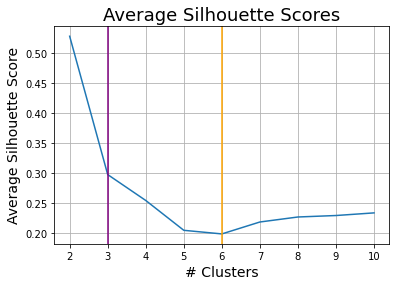

In [ ]:
plt.plot(np.arange(2,n_kclusters+1),avg_silhouette_scores)
plt.axvline(x=3,c=colors[5])
plt.axvline(x=6,c=colors[2])
plt.title("Average Silhouette Scores",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Average Silhouette Score",size=14)
plt.grid(True)
plt.show()

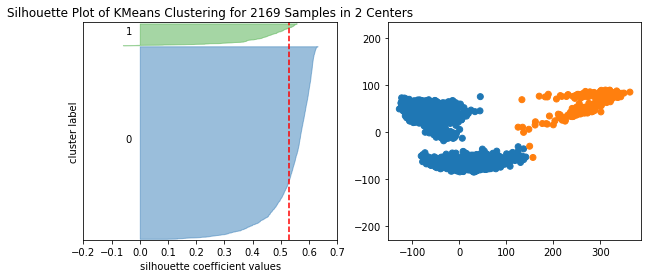

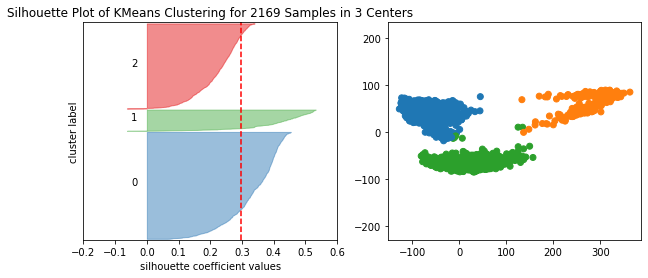

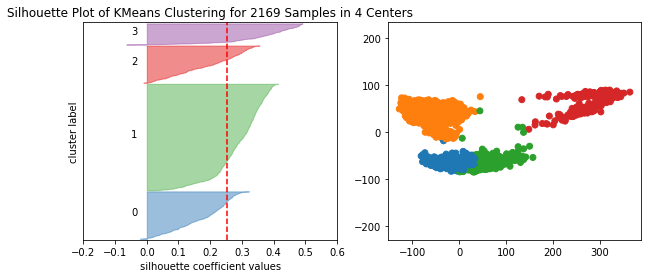

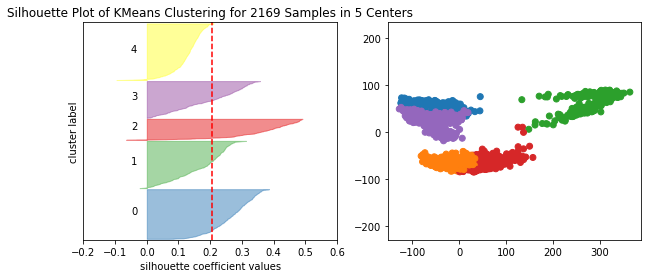

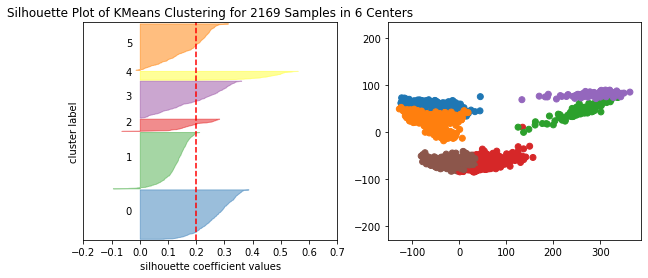

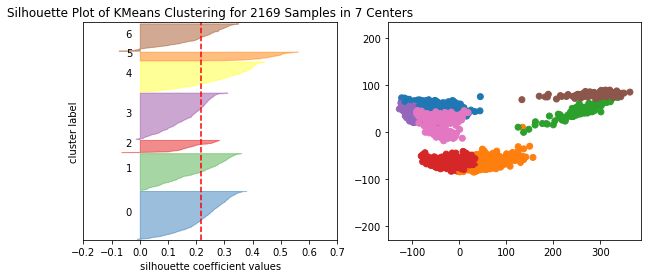

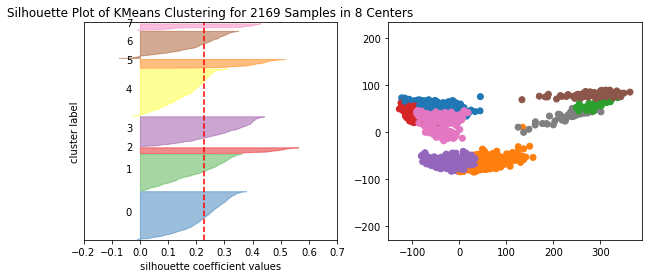

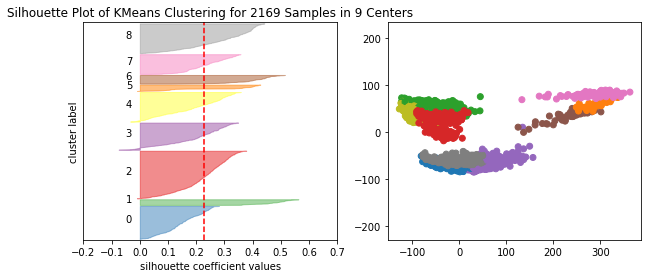

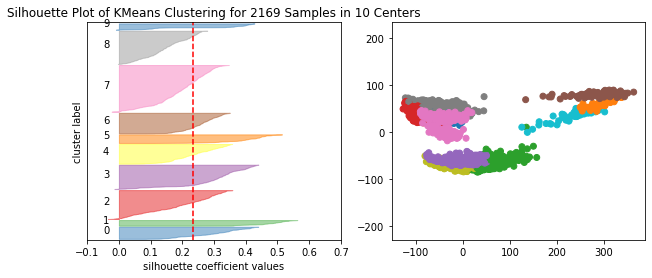

In [ ]:
visualizers = [SilhouetteVisualizer(all_kmeans[i], colors='yellowbrick',is_fitted=True) for i in range(1,n_kclusters)]
for i in range(n_kclusters-1):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
    visualizer = SilhouetteVisualizer(all_kmeans[i+1], colors='yellowbrick',is_fitted=True,ax=ax1)
    visualizer.fit(std_z[:,0:50])
    
    idx_colors = np.array(resolve_colors(i+2))
    ax2.scatter(std_z[:,0],std_z[:,1],c=idx_colors[all_kmeans[i+1].labels_])
    ax2.axis("equal")
    
    # If we want to set axes to be the same for all plots, need to do something like this
    # instead of visualizer.show(), which resets the axes
    visualizer.finalize()
    #ax1.set_xlim((-.4,.8))
    plt.show()

# Logistic Regression

In [30]:
###8 clusters
kmeans_8 = KMeans(n_clusters=8,n_init=10)
labels_8 = kmeans_8.fit_predict(std_z[:,0:320])


In [8]:
###36 clusters
kmeans_36 = KMeans(n_clusters=36,n_init=10)
labels_36 = kmeans_36.fit_predict(std_z[:,0:320])

In [33]:
print(labels_36.shape)
print(np.unique(labels_36))

(2169,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


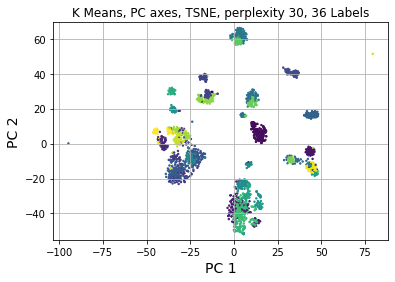

In [13]:
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=labels_36,s=2)
plt.title("K Means, PC axes, TSNE, perplexity 30, 36 Labels",size=12)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.grid(True)
plt.show()

Divide into training and validation sets


In [31]:
### 8 clusters
np.random.seed(317)
perm = np.random.permutation(std_feature_matrix.shape[0])
n_train = int(4/5*std_feature_matrix.shape[0])
print(n_train)
X_train = std_feature_matrix[perm[:n_train]]
y_train = labels_8[perm[:n_train]]
X_val = std_feature_matrix[perm[n_train:]]
y_val = labels_8[perm[n_train:]]

1735


In [9]:
### 36 labels
np.random.seed(317)
perm = np.random.permutation(std_feature_matrix.shape[0])
n_train = int(4/5*std_feature_matrix.shape[0])
print(n_train)
X_train = std_feature_matrix[perm[:n_train]]
y_train = labels_36[perm[:n_train]]
X_val = std_feature_matrix[perm[n_train:]]
y_val = labels_36[perm[n_train:]]

1735


In [ ]:
print(np.unique(labels))
print(labels.shape)

[0 1 2 3 4 5 6 7]
(2169,)


In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

## One vs Rest Regression

In [ ]:
log_reg = LogisticRegression(penalty="none",multi_class="ovr").fit(X_train,y_train)

In [ ]:
log_reg.score(X_train,y_train)

1.0

In [ ]:
log_reg.score(X_val,y_val)

0.9769585253456221

## MultiDimension Logistic Regression

In [ ]:
log_reg_l1 = LogisticRegression(penalty="l1",C=0.1,solver="liblinear",max_iter=5000,multi_class="ovr").fit(X_train,y_train)
log_reg_l1.score(X_train,y_train)

1.0

In [ ]:
log_reg_l1.score(X_val,y_val)

0.9608294930875576

### Select L2 and C=1 as the optimized parameters

In [33]:
log_reg_l2 = LogisticRegression(penalty="l2",C=1,solver="liblinear",max_iter=5000,multi_class="ovr").fit(X_train,y_train)
log_reg_l2.score(X_train,y_train)

1.0

In [34]:
log_reg_l2.score(X_val,y_val)

0.956221198156682

In [ ]:
print(log_reg_l2.coef_.shape)

(8, 45768)


# Dimension Reduction

### Select the first 320 largest coefficients

In [35]:
theta_sum=np.sum(np.abs(log_reg_l2.coef_),axis=0)

max_theta_320idx=np.argpartition(theta_sum,320)[-320:]
max_theta_320idx.sort()
theta_320=log_reg_l2.coef_[:,max_theta_320idx]
print(theta_320.shape)

(8, 320)


In [ ]:
std_feature_matrix.shape[1]


45768

In [14]:
p2_raw_feature=np.load("/content/drive/My Drive/Stats-W2/p2_evaluation/X_train.npy")
p2_labels=np.load("/content/drive/My Drive/Stats-W2/p2_evaluation/y_train.npy")
p2_raw_test_feature=np.load("/content/drive/My Drive/Stats-W2/p2_evaluation/X_test.npy")
p2_test_labels=np.load("/content/drive/My Drive/Stats-W2/p2_evaluation/y_test.npy")

In [ ]:
print(p2_raw_feature.shape)
print(p2_labels.shape)
print(np.unique(p2_labels))

(1077, 45768)
(1077,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [46]:
### Reduce to 100 coefficients
p2_feature_short=p2_raw_feature[:,max_theta_100idx]
p2_test_short=p2_raw_test_feature[:,max_theta_100idx]
std_p2_feature=np.log2(p2_feature_short+1)
std_p2_test=np.log2(p2_test_short+1)
print(std_p2_test.shape)
print(np.unique(p2_labels))

(1108, 100)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [36]:
### Reduce to 320 coefficients
p2_feature_short=p2_raw_feature[:,max_theta_320idx]
p2_test_short=p2_raw_test_feature[:,max_theta_320idx]
std_p2_feature=np.log2(p2_feature_short+1)
std_p2_test=np.log2(p2_test_short+1)
print(std_p2_test.shape)
print(np.unique(p2_labels))

(1108, 320)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [37]:
pca_p2 = PCA()

###---Standardized data PCA and Variance
std_z_p2 = pca_p2.fit_transform(std_p2_feature)

In [17]:
kmeans_p2 = KMeans(n_clusters=36,n_init=10)
y_p2 = kmeans_p2.fit_predict(std_z_p2[:,0:320])
np.unique(y_p2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int32)

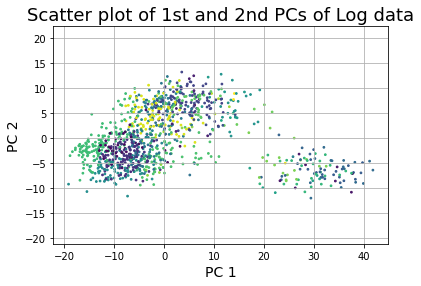

In [18]:
plt.scatter(std_z_p2[:,0],std_z_p2[:,1],c=y_p2,s=3)
plt.title("Scatter plot of 1st and 2nd PCs of Log data",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.grid(True)
plt.axis("equal")
plt.show()

## Train the evaluation classifier

In [38]:
p2_classifier_l2 = LogisticRegression(penalty="l2",C=1,solver="liblinear",max_iter=20000,multi_class="ovr").fit(std_p2_feature,p2_labels)
p2_classifier_l2.score(std_p2_feature,p2_labels)

1.0

In [39]:
p2_classifier_l2.score(std_p2_test,p2_test_labels)

0.5036101083032491

In [68]:
p2_test_labels[1000:1100]

array([31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35])